## EDA

- 1変量の可視化
- 2変量の可視化
- 多変量の可視化
- 次元削減

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
train.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# データの形状を確認
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
# 型の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# 記述統計料
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0000,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1379.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,730.5000,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5062,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158,180921.1959
std,421.6100,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281,79442.5029
min,1.0000,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000,34900.0000
25%,365.7500,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000,129975.0000
50%,730.5000,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000,163000.0000
75%,1095.2500,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000,214000.0000
max,1460.0000,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000,755000.0000


In [8]:
# 数値型の列
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# 数値型のデータ
numeric_features.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0000,8450,7,5,2003,2003,196.0000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0000,9600,6,8,1976,1976,0.0000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0000,11250,7,5,2001,2002,162.0000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0000,2,608,0,42,0,0,0,0,0,9,2008,223500


In [10]:
# 西暦を意味する列
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
# 西暦列を確認
for feature in year_feature:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

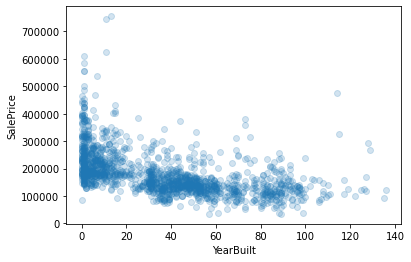

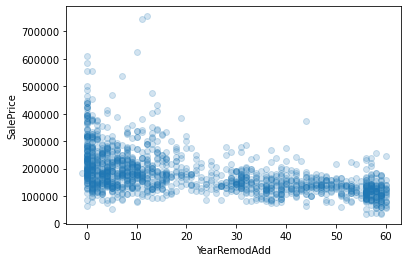

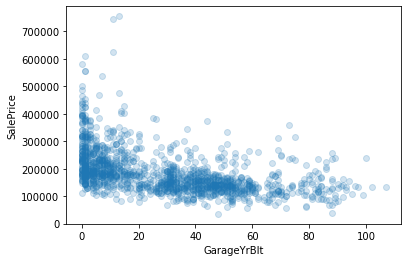

In [12]:
# 西暦列と住宅価格の関係を確認
for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'], alpha=.2)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [13]:
# 離散変数を確認
# ユニークな値が25種類未満、かつ西暦やIDではないものを離散変数と定義
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [14]:
train[discrete_feature].head(3)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9


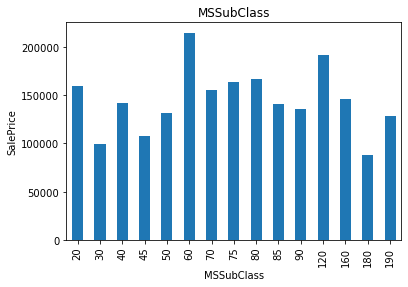

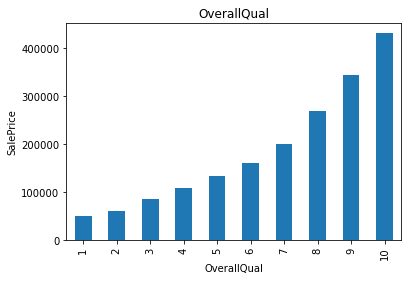

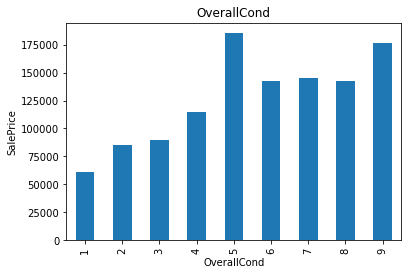

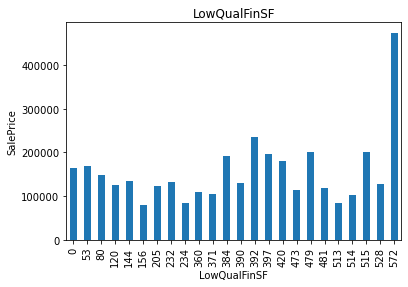

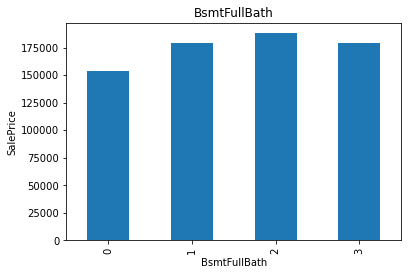

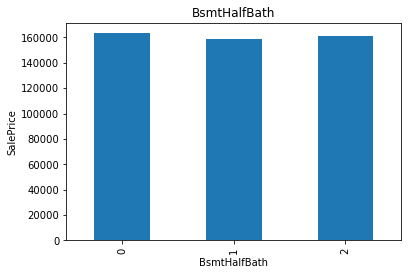

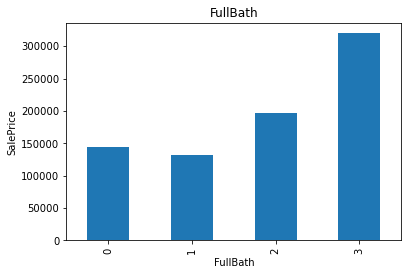

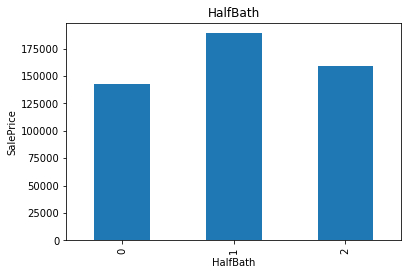

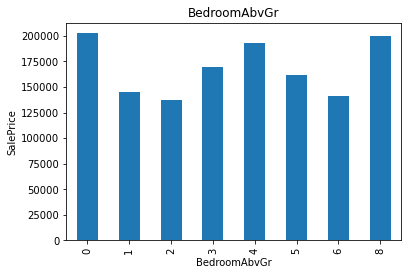

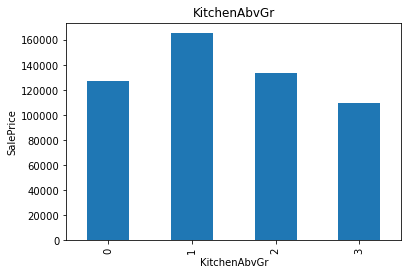

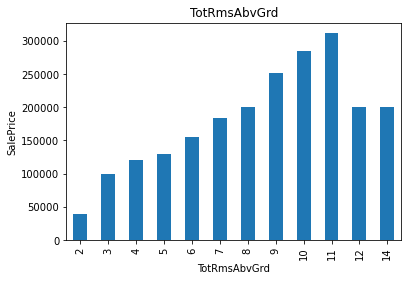

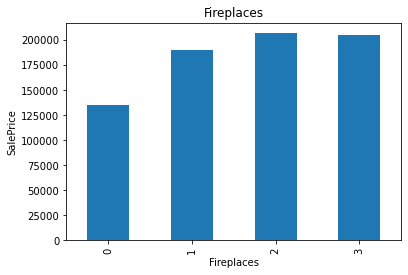

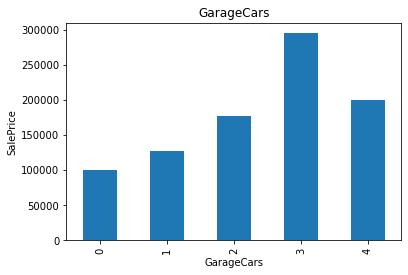

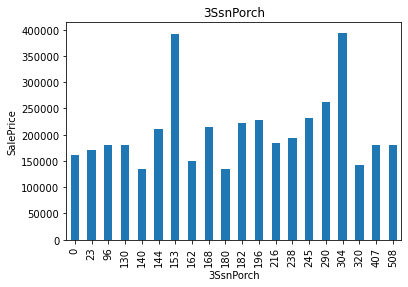

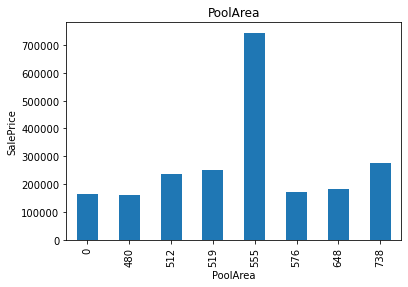

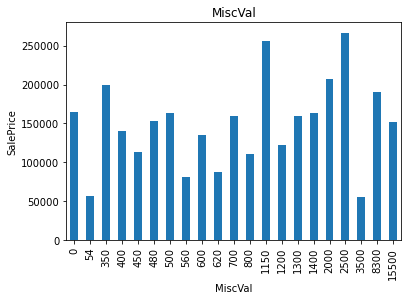

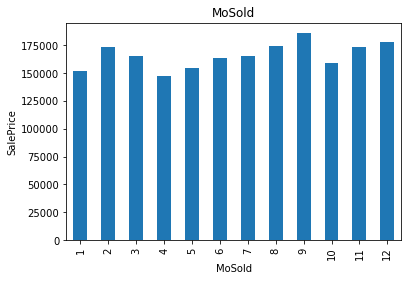

In [15]:
# 離散変数と住宅価格の関係を確認
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [16]:
# 連続変数の確認
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Continuous Feature Count 16


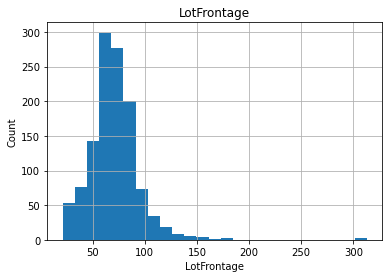

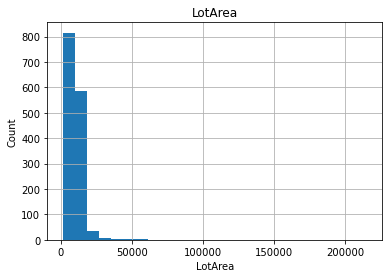

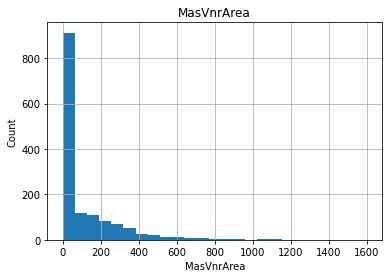

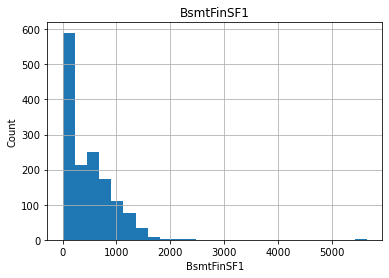

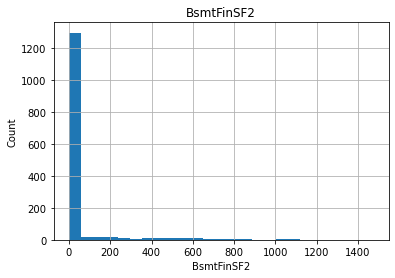

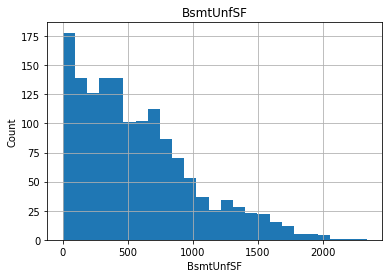

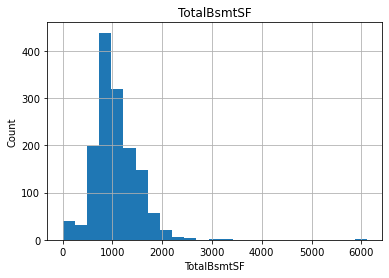

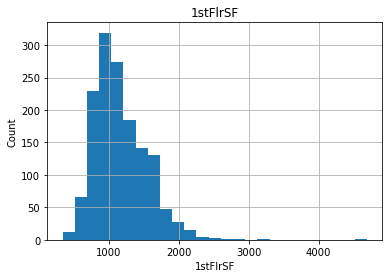

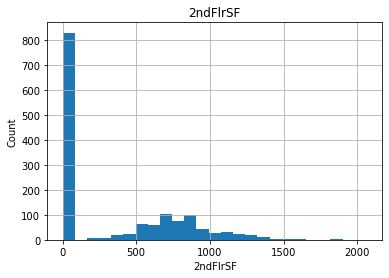

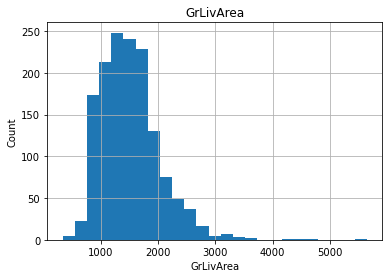

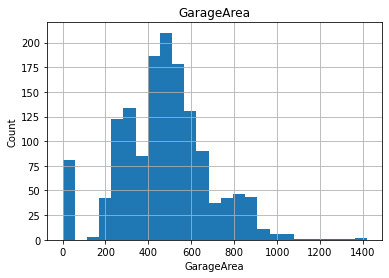

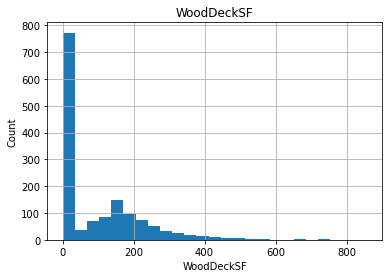

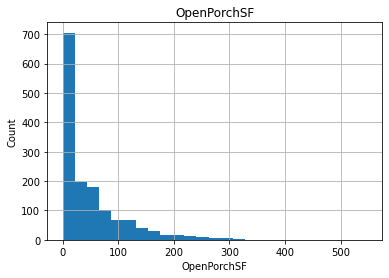

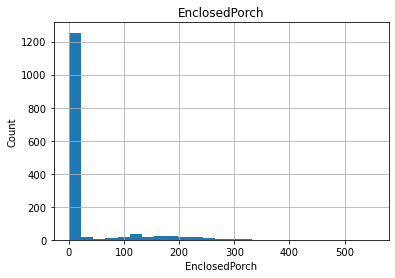

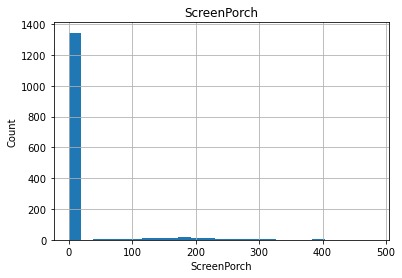

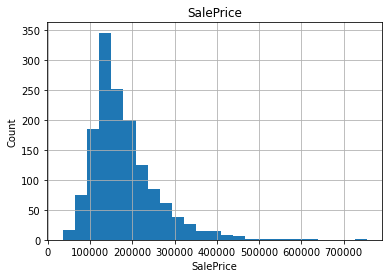

In [17]:
# 連続変数と住宅価格の関係
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [18]:
# カテゴリカル変数の確認
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

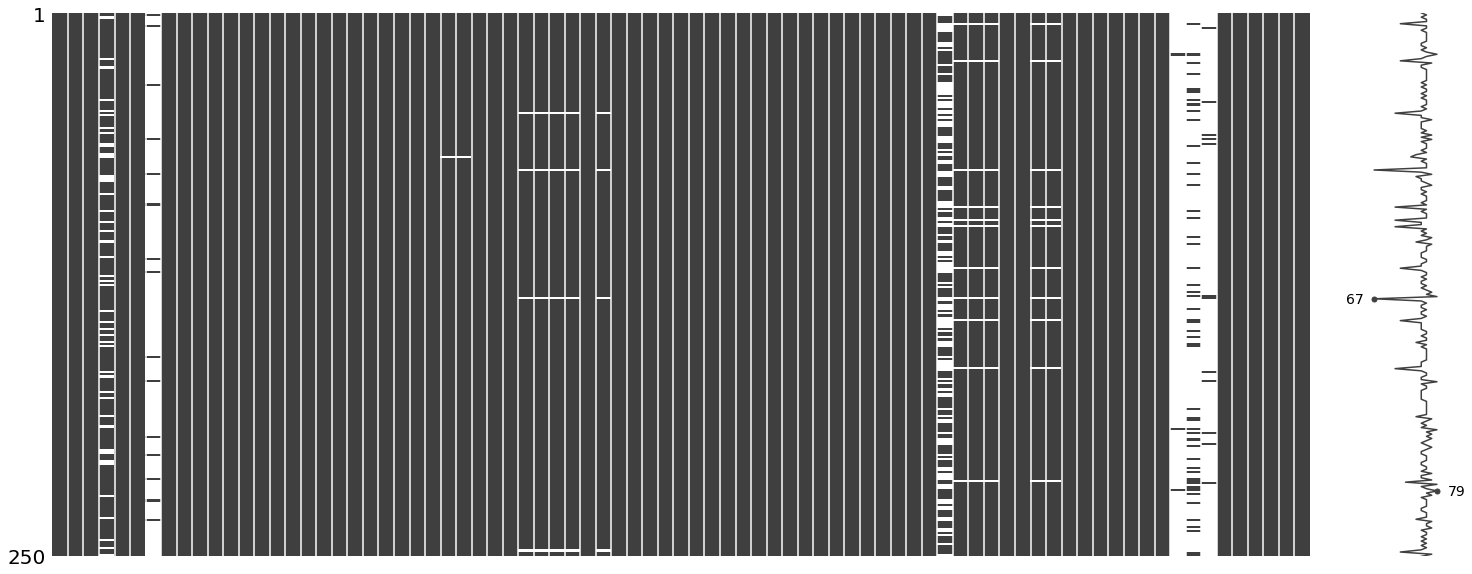

In [19]:
# 欠損値の可視化
msno.matrix(train.sample(250));

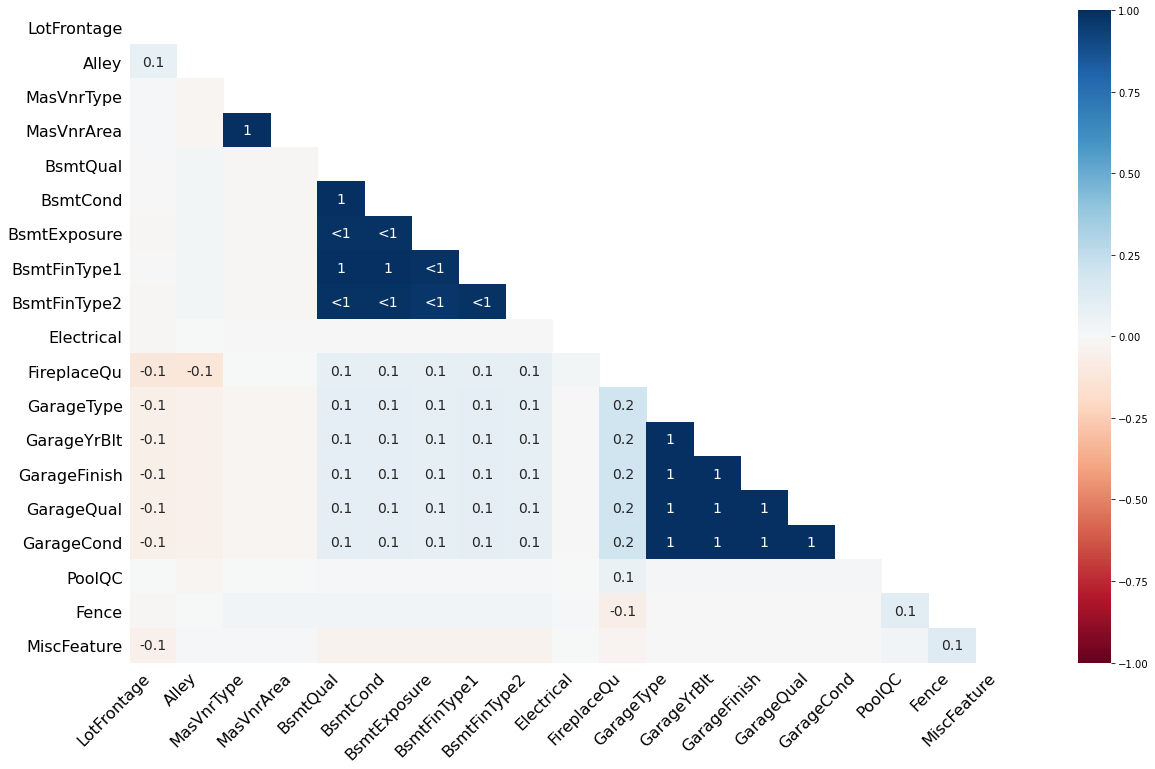

In [20]:
# 特例の2列の欠損値の相関（ある変数の欠損が別の変数の欠損にどれくらい影響するか）ヒートマップ
msno.heatmap(train);

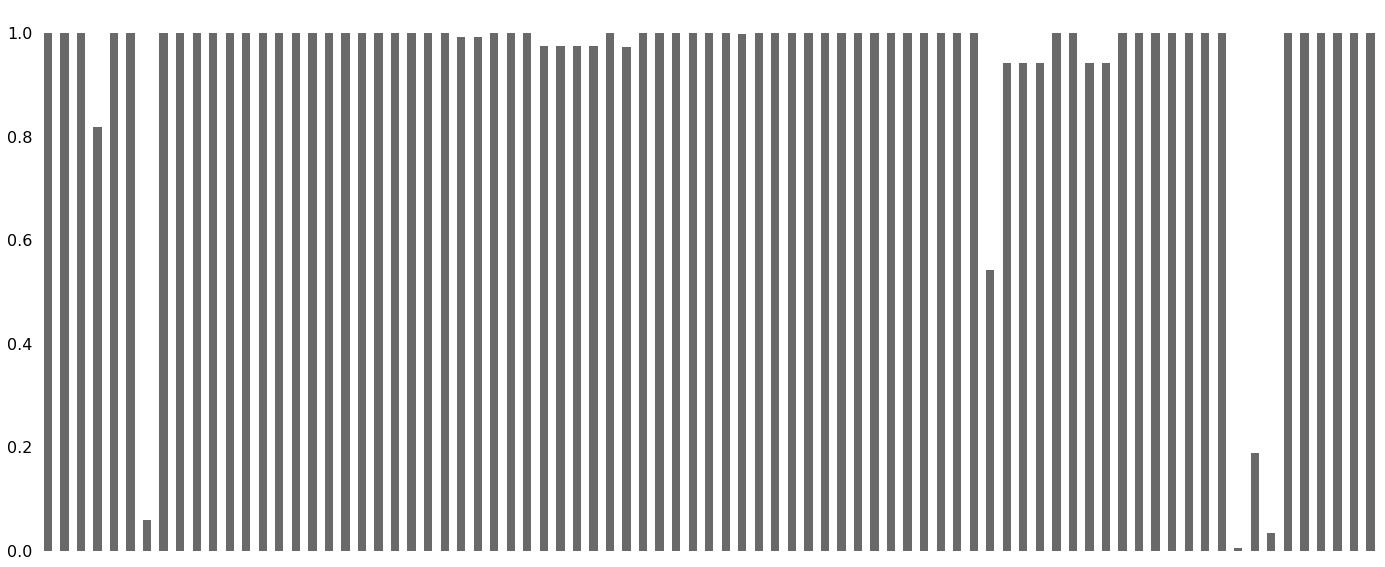

In [21]:
# 欠損値の分布
msno.bar(train.sample(1000));

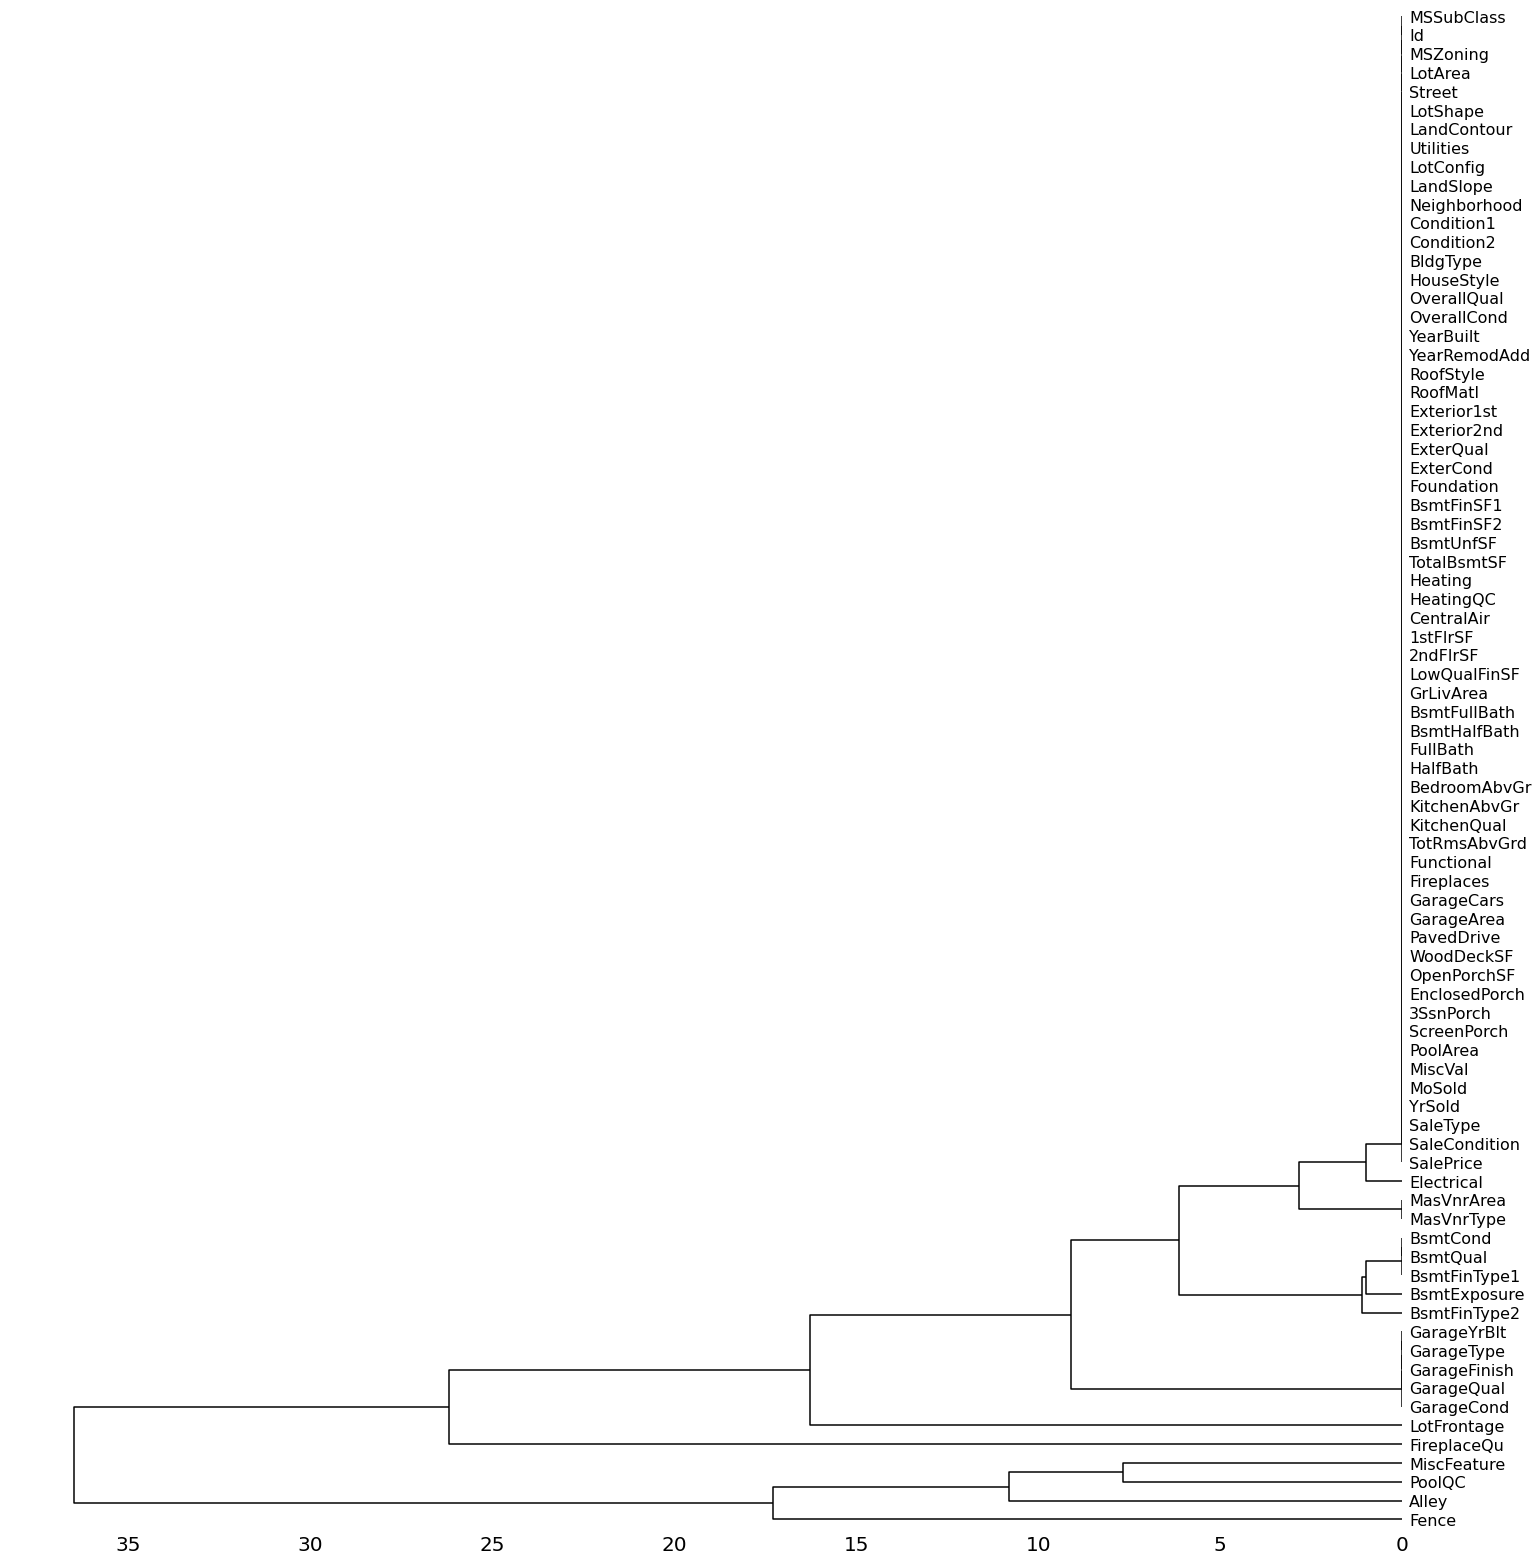

In [22]:
# 欠損値のデンドログラム
msno.dendrogram(train);

In [23]:
# 歪度と尖度
train.skew(), train.kurt()

(Id               0.0000
 MSSubClass       1.4077
 LotFrontage      2.1636
 LotArea         12.2077
 OverallQual      0.2169
 OverallCond      0.6931
 YearBuilt       -0.6135
 YearRemodAdd    -0.5036
 MasVnrArea       2.6691
 BsmtFinSF1       1.6855
 BsmtFinSF2       4.2553
 BsmtUnfSF        0.9203
 TotalBsmtSF      1.5243
 1stFlrSF         1.3768
 2ndFlrSF         0.8130
 LowQualFinSF     9.0113
 GrLivArea        1.3666
 BsmtFullBath     0.5961
 BsmtHalfBath     4.1034
 FullBath         0.0366
 HalfBath         0.6759
 BedroomAbvGr     0.2118
 KitchenAbvGr     4.4884
 TotRmsAbvGrd     0.6763
 Fireplaces       0.6496
 GarageYrBlt     -0.6494
 GarageCars      -0.3425
 GarageArea       0.1800
 WoodDeckSF       1.5414
 OpenPorchSF      2.3643
 EnclosedPorch    3.0899
 3SsnPorch       10.3043
 ScreenPorch      4.1222
 PoolArea        14.8284
 MiscVal         24.4768
 MoSold           0.2121
 YrSold           0.0963
 SalePrice        1.8829
 dtype: float64,
 Id               -1.2000
 MSSubC

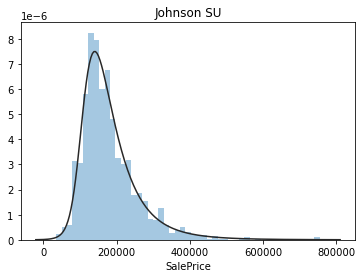

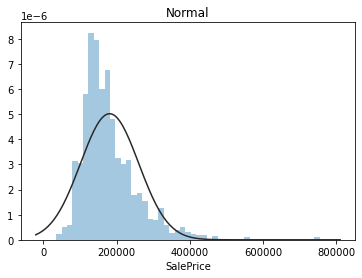

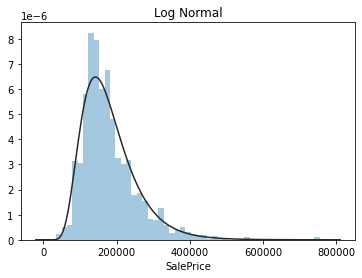

In [24]:
# 住宅価格分布の近似
# 住宅価格は正規分布ではないことに注意する
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu);
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm);
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

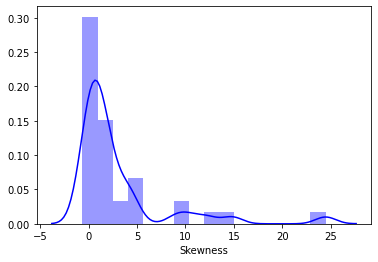

In [25]:
# 歪度の分布
sns.distplot(train.skew(),color='blue',axlabel ='Skewness');

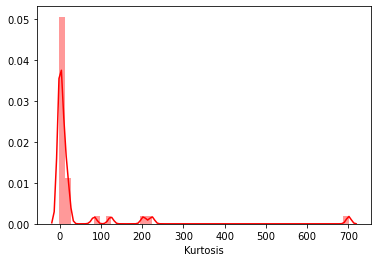

In [26]:
# 尖度の分布
# plt.figure(figsize = (12,8))
sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

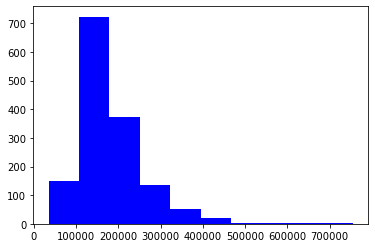

In [27]:
# 住宅価格の分布
plt.hist(train['SalePrice'],orientation='vertical',histtype='bar',color='blue')
plt.show()

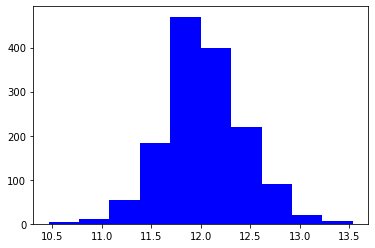

In [28]:
# 対数スケールに変換
target = np.log(train['SalePrice'])
target.skew()
plt.hist(target,color='blue')
plt.show()

In [29]:
# 住宅価格と相関の高い変数を確認
correlation = numeric_features.corr()
# display(correlation)
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.0000
OverallQual      0.7910
GrLivArea        0.7086
GarageCars       0.6404
GarageArea       0.6234
TotalBsmtSF      0.6136
1stFlrSF         0.6059
FullBath         0.5607
TotRmsAbvGrd     0.5337
YearBuilt        0.5229
YearRemodAdd     0.5071
GarageYrBlt      0.4864
MasVnrArea       0.4775
Fireplaces       0.4669
BsmtFinSF1       0.3864
LotFrontage      0.3518
WoodDeckSF       0.3244
2ndFlrSF         0.3193
OpenPorchSF      0.3159
HalfBath         0.2841
LotArea          0.2638
BsmtFullBath     0.2271
BsmtUnfSF        0.2145
BedroomAbvGr     0.1682
ScreenPorch      0.1114
PoolArea         0.0924
MoSold           0.0464
3SsnPorch        0.0446
BsmtFinSF2      -0.0114
BsmtHalfBath    -0.0168
MiscVal         -0.0212
Id              -0.0219
LowQualFinSF    -0.0256
YrSold          -0.0289
OverallCond     -0.0779
MSSubClass      -0.0843
EnclosedPorch   -0.1286
KitchenAbvGr    -0.1359
Name: SalePrice, dtype: float64 



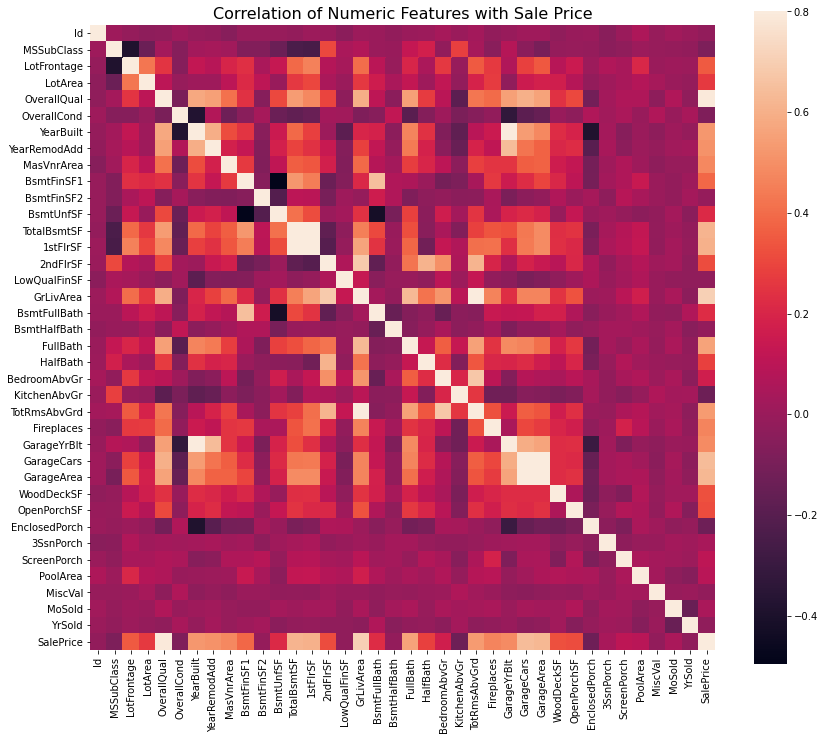

In [30]:
# 相関のヒートマップ
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8);

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


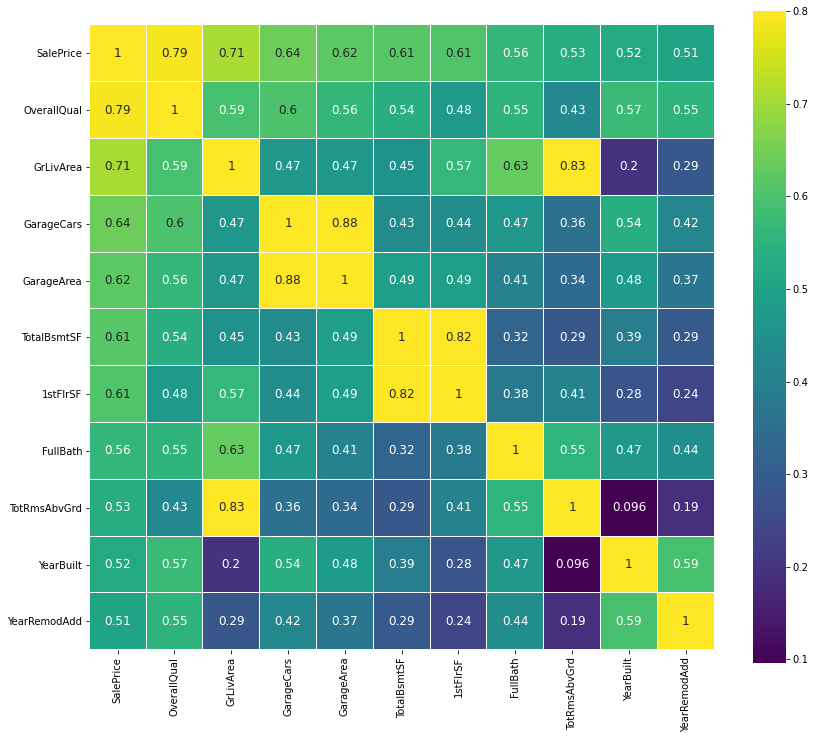

In [31]:
# 住宅価格と相関が高い上位11個
k=11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values);

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


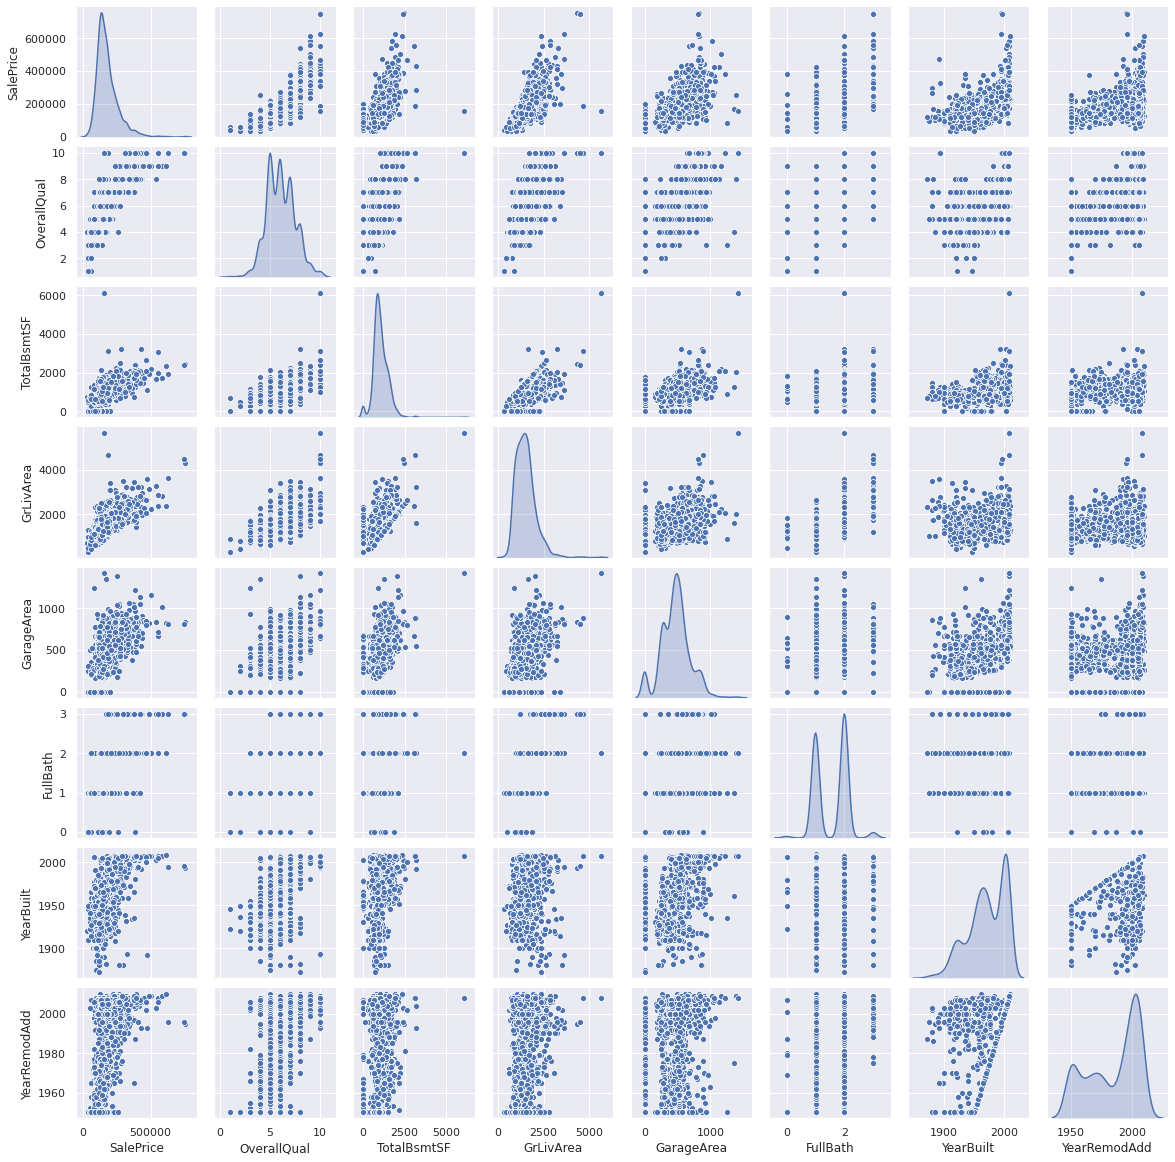

In [32]:
# ペアプロット
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()

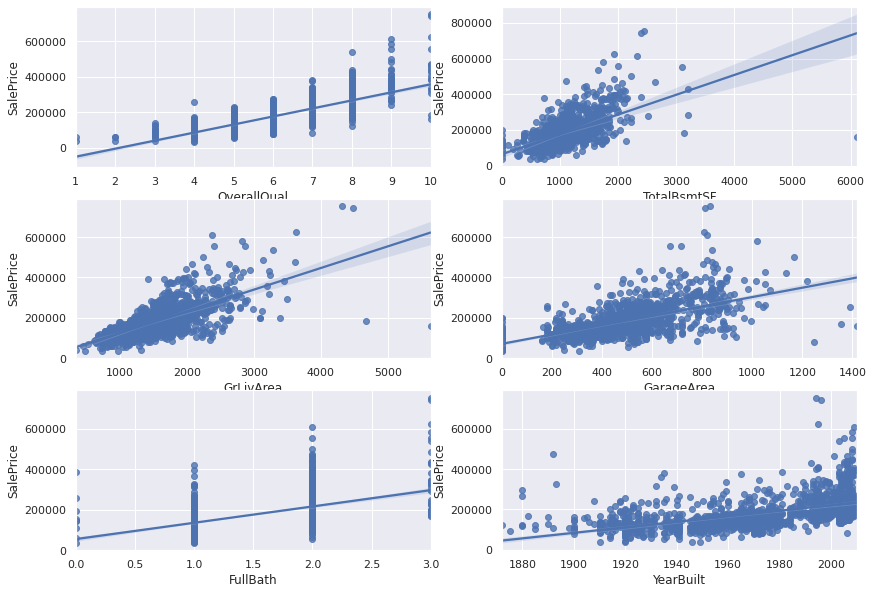

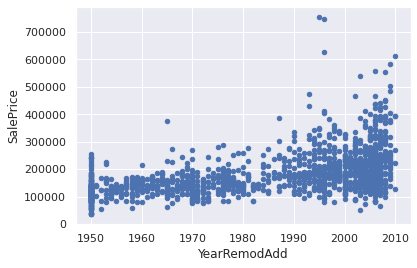

In [33]:
# 散布図と線形回帰
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice');

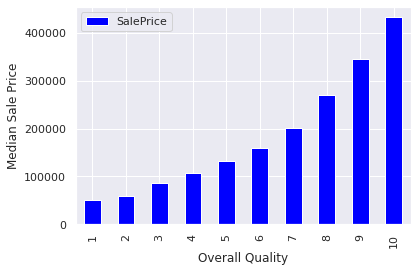

In [34]:
# OverallQual と住宅価格の中央値の関係
saleprice_overall_quality=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
saleprice_overall_quality.plot(kind = 'bar',color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

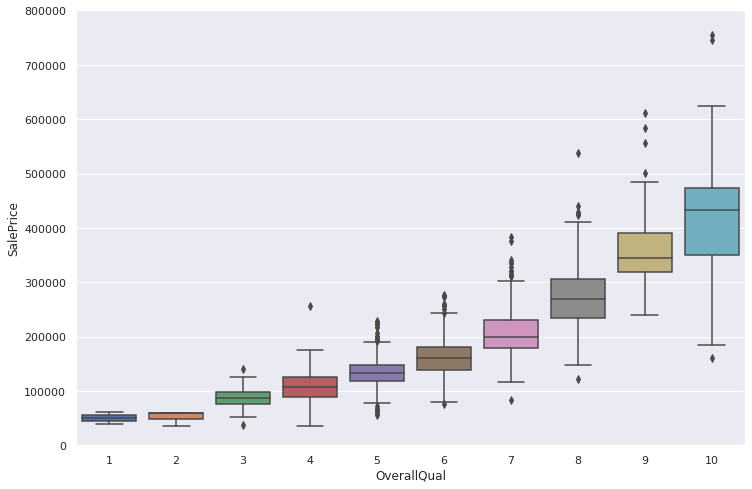

In [35]:
# OverallQual と住宅価格の箱ひげ図
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

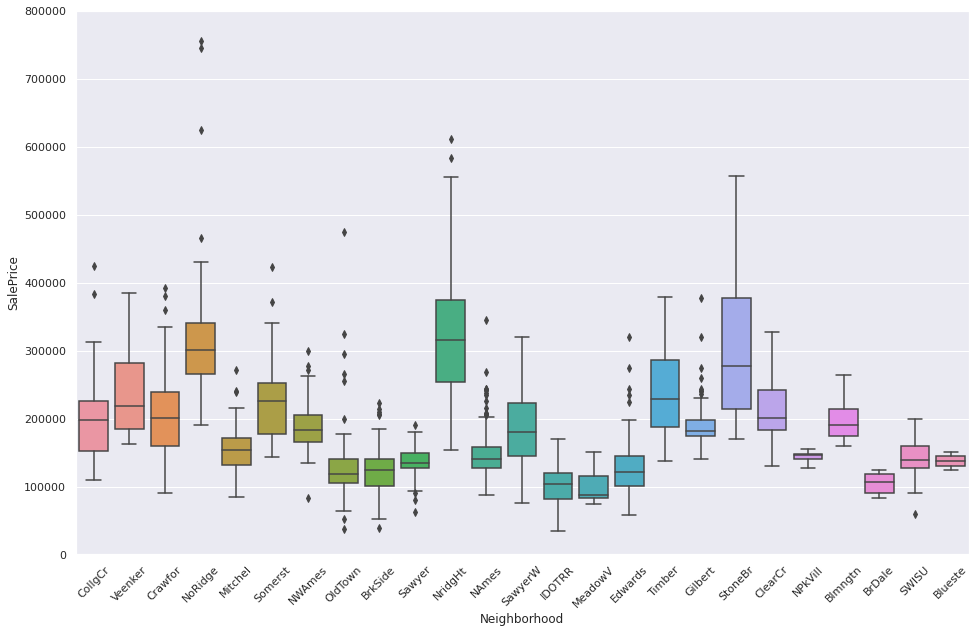

In [36]:
# neighborhood 列と住宅価格の箱ひげ図
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

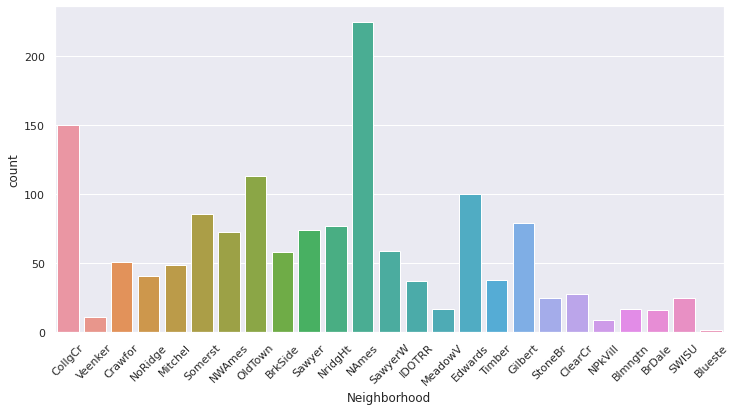

In [37]:
# Neighborhood とデータ件数の確認
plt.figure(figsize = (12, 6))
sns.countplot(x='Neighborhood',data=data)
xt = plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


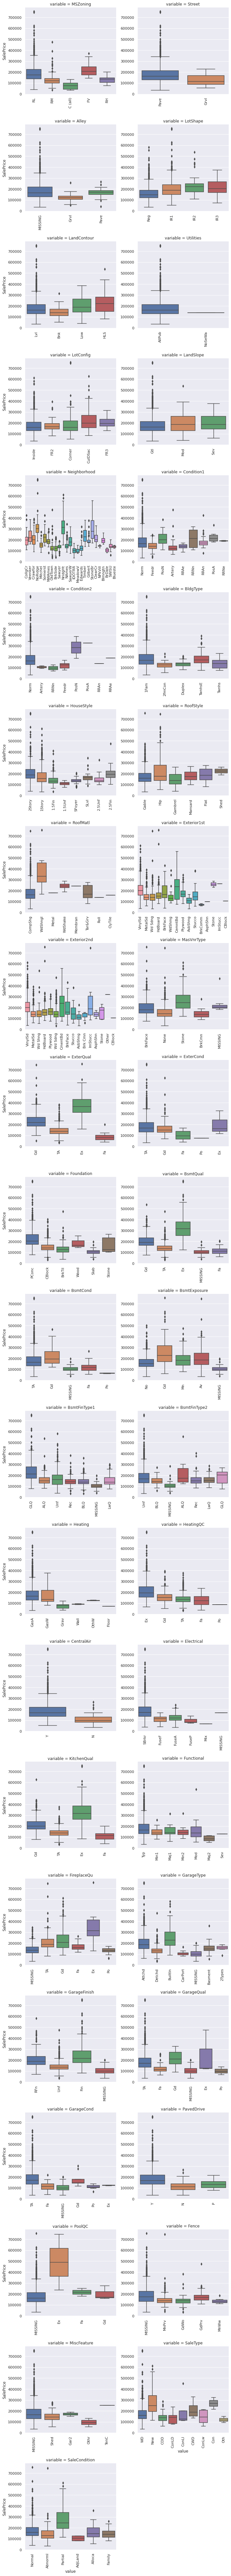

In [38]:
# カテゴリ変数と住宅価格の箱ひげ図
for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train,id_vars=['SalePrice'],value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g = g.map(boxplot, "value", "SalePrice")

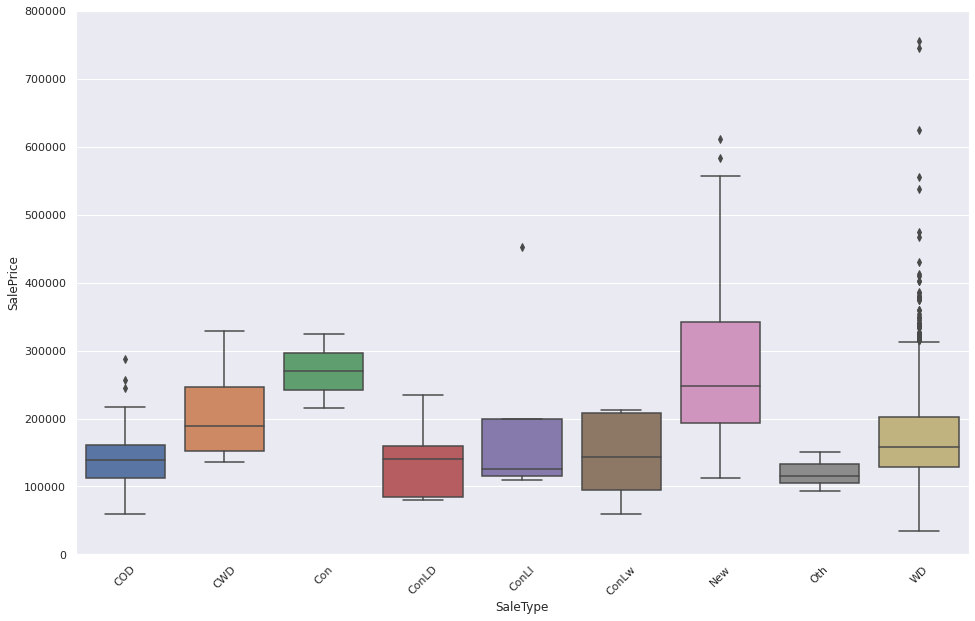

In [39]:
# SaleType と住宅価格の関係
var = 'SaleType'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

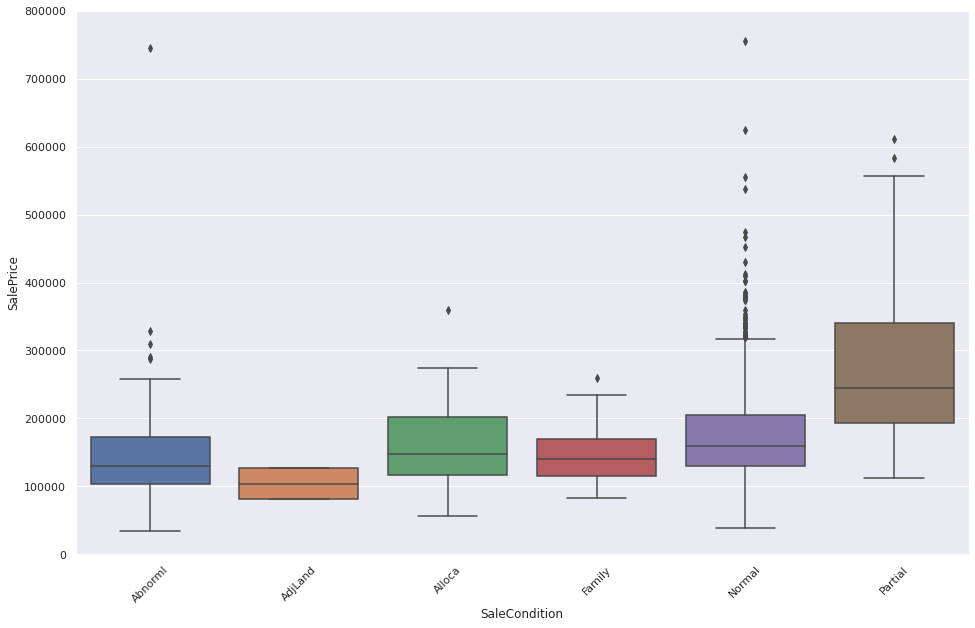

In [40]:
# SaleCondition と住宅価格の関係
var = 'SaleCondition'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

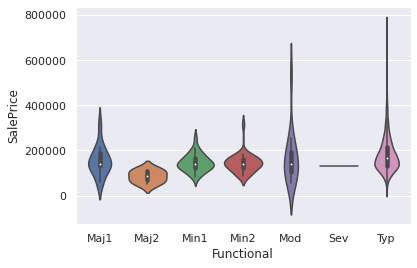

In [42]:
# Functional と住宅価格の関係
sns.violinplot('Functional', 'SalePrice', data = train);

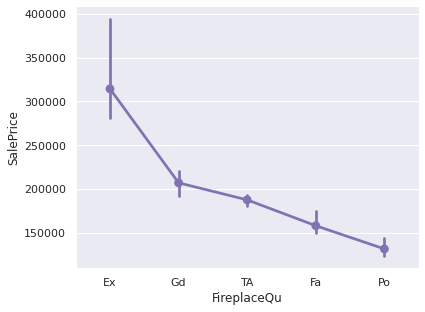

In [46]:
# FireplaceQu と住宅価格の関係
sns.catplot('FireplaceQu','SalePrice',data=train,color='m',\
            estimator=np.median,order=['Ex','Gd','TA','Fa','Po'],height=4.5,aspect=1.35,kind='point');

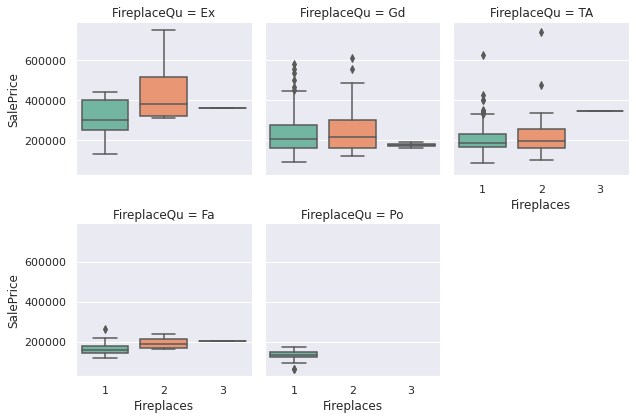

In [50]:
# FireplaceQu と住宅価格の関係
g = sns.FacetGrid(train,col='FireplaceQu',col_wrap=3,col_order=['Ex','Gd','TA','Fa','Po'])
g.map(sns.boxplot,'Fireplaces','SalePrice',order=[1,2,3],palette='Set2');

In [51]:
# 欠損値の集計
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.1774
GarageYrBlt,81,0.0555
MasVnrArea,8,0.0055
BsmtFinSF1,0,0.0000
LowQualFinSF,0,0.0000
2ndFlrSF,0,0.0000
1stFlrSF,0,0.0000
TotalBsmtSF,0,0.0000
BsmtUnfSF,0,0.0000


In [52]:
# カテゴリ変数の欠損値を集計
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.9952
MiscFeature,1406,0.9630
Alley,1369,0.9377
Fence,1179,0.8075
FireplaceQu,690,0.4726
GarageCond,81,0.0555
GarageQual,81,0.0555
GarageFinish,81,0.0555
GarageType,81,0.0555


In [54]:
# train と test のユニーク値
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Features in test set 'MSZoning' has '5' unique categories
Features in test set 'Street' has '2' unique categories
Features in test set 'Alley' has '2' unique categories
Features in test set 'LotShape' has '4' unique categories
Features in test set 'LandContour' has '4' unique categories
Features in test set 'Utilities' has '1' unique categories
Features in test set 'LotConfig' has '5' unique categories
Features in test set 'LandSlope' has '3' unique categories
Features in test set 'Neighborhood' has '25' unique categories
Features in test set 'Condition1' has '9' unique categories
Features in test set 'Condition2' has '5' unique categories
Features in test set 'BldgType' has '5' unique categories
Features in test set 'HouseStyle' has '7' unique categories
Features in test set 'RoofStyle' has '6' unique categories
Features in test set 'RoofMatl' has '4' unique categories
Features in test set 'Exterior1st' has '13' unique categories
Features in test set 'Exterior2nd' has '15' unique cate

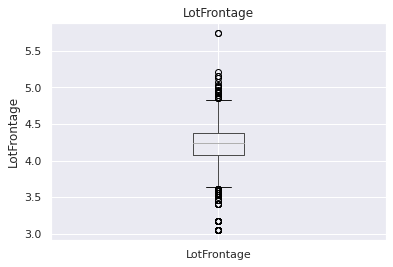

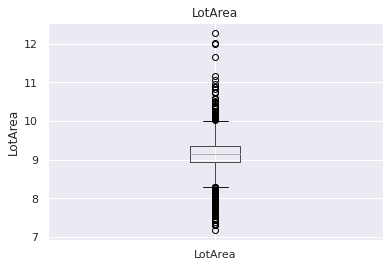

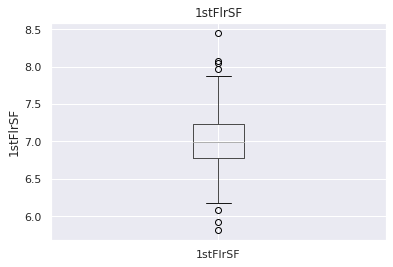

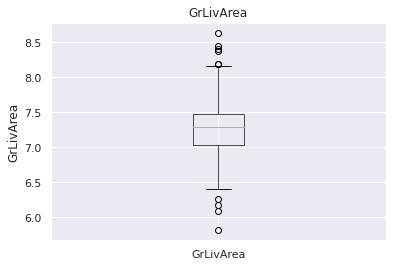

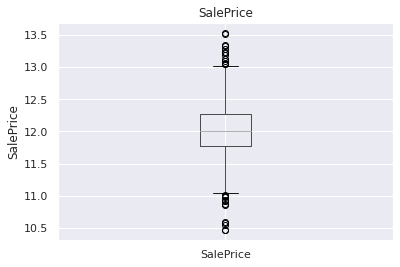

In [55]:
# 外れ値
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()